# **Names:** QIU Rui, LIU Pengze

**EIDs:** ruiqiu5, pengzeliu2

**Kaggle Team Name:** Oops, it's not the ground truth

# CS4487 - Course Project

Due date: Nov 30, 11:59pm

## Goal

The course project is the following:

### Predicting outcomes of schizophrenia patient

> The goal is to predict the 12-year outcomes of patients with schizophernia using 3-years of data collected after the first diagnosed episode.  The dataset contains two prediction tasks: 1) predict Suicide death within 12 year time-span; 2) predict treatment resistance to antipsychotic medication (if a patient becomes resistant to medication, than another medication Clozapine is prescribed). A good prediction model would help create early treatment models to identify potential future problems.

> There are two types of data: 1) cross-sectional data consists of patient measurements taken at a specific time point (12 years after the first diagnosis); 2) longitidual data consists of 3 years of measurements after the first episode.  For this problem, the cross-sectional data contains the class we want to predict.  The longitudinal data contains baseline information and monthly reports of symptoms and functioning for the first 3 years.


You only need to select one of these tasks (mortality or treatment resistance) for the course project. 

<span style="color:red">_**NOTE: This dataset is provided by the Psychiatry department HKU and contains some sensitive and propietary information. Do NOT redistribute this dataset to other people.**_</span>


## Groups
Projects should be done in Groups of 2.  To sign up for a group, go to Canvas and under "People", join one of the existing "Project Groups".  _For group projects, the project report must state the percentage contribution from each project member._

## Methodology
You are free to choose the methodology to solve the task.  In machine learning, it is important to use domain knowledge to help solve the problem.  Hence, instead of blindly applying the algorithms to the data you need to think about how to represent the data in a way that makes sense for the algorithm to solve the task. 


## Evaluation on Kaggle

The final evaluation will be performed on Kaggle. See the below code about the evaluation procedure.

**Note:** You can only submit 2 times per day to Kaggle!

## Project Presentation

Each project group needs to give a presentation at the end of the semester.  The presentation time is 8 minutes.  You _must_ give a presentation.

## What to hand in
You need to turn in the following things:

1. This ipynb file `CourseProject-2018.ipynb` with your source code and documentation. **You should write about all the various attempts that you make to find a good solution.**
2. Your final submission file to Kaggle.
3. The ipynb file `CourseProject-2018-final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle. **This code will be used to verify that your Kaggle submission is reproducible.**
4. Presentation slides.

Files should be uploaded to "Course Project" on Canvas.


## Grading
The marks of the assignment are distributed as follows:
- 40% - Results using various feature representations, dimensionality reduction methods, classifiers, etc.
- 20% - Trying out feature representations (e.g. adding/engineering additional features, combining features, time-series features) or methods not used in the tutorials.
- 15% - Quality of the written report.  More points for insightful observations and analysis.
- 15% - Project presentation
- 10% - Final ranking on the Kaggle test data (private leaderboard).

**Late Penalty:** 25 marks will be subtracted for each day late.

<hr>

## Getting started

The following code will get you started reading in the datasets, train a baseline classifier and evaluate it.

In [3]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import pandas as pd

/home/qiurui/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/qiurui/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/qiurui/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20

## Load data

The zip file contains the following files:
  - **Mortality prediction task**
    - `mortality/mortality_suicide.csv` - class labels (suicide).
    - `mortality/mortality_baseline.csv` - longitudinal data.
    - `mortality/mortality_baseline_vars.csv` - descriptions of the baseline variables.
    - `mortality/mortality_training.csv` - indices for training sets for 10 experiment trials.
    - `mortality/mortality_testing.csv` - indices for test sets for 10 experiment trials.
  - **Treatment Resistance prediction task**
    - `treatres/clozapine_tr.csv` - class label (treatment resistance).
    - `treatres/clozapine_baseline.csv` - longitudinal data.
    - `treatres/clozapine_baseline_vars.csv` - descriptions of the baseline variables
    - `treatres/treatres_training.csv` - indices for training sets for 10 experiment trials.
    - `treatres/treatres_testing.csv` - indices for testing sets for 10 experiment trials


In [4]:
# Set this variable according to the task you will do.
#   True=suicide data, False=treatment resistance data
doMortality = True

Now load the data files, join the tables according to subject ID.

In [5]:
# codes for "Missing Values", which are convereted to nan
na_values = [777, 888, 999, '777', '888', '999']
na_values = [777, 888, 999, '777', '888', '999',' ']
if (doMortality):
    ### load the data on mortality ###################################################
    df_X = pd.read_csv('mortality/mortality_suicide.csv', na_values=na_values)
    df_L = pd.read_csv('mortality/mortality_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('mortality/mortality_baseline_vars.csv', na_values=na_values)

    # get the labels and HCScode (subject IDs)
    df_suic = df_X[['HCScode', 'Suicide_12']]    
    # select data_L by HCScodes in subj_suic
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_suic['HCScode'])]
    # merge data, and sort
    df = df_suic.set_index('HCScode').join(df_L_part.set_index('HCS_code'))
    # sort by HCScode
    df = df.sort_values("HCScode")
    # rename class variable name
    df.rename(index=str, columns={'Suicide_12': 'Y'}, inplace=True)
    
else:
    ### load the data on treatment resistance #########################################
    df_X = pd.read_csv('treatres/clozapine_tr.csv', na_values=na_values)
    df_L = pd.read_csv('treatres/clozapine_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('treatres/clozapine_baseline_vars.csv', na_values=na_values)

    # get HCS codes and labels
    df_tr = df_X[['HCS3', 'TR_nonTR_Inclusive']]
    # select data_L by available codes
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_tr['HCS3'])]
    # merge data
    df = df_tr.set_index('HCS3').join(df_L_part.set_index('HCS_code'))
    # remove nan values, and sort
    df = df[(df.TR_nonTR_Inclusive >= 0)].sort_values("HCS3")
    # rename class variable name
    df.rename(index=str, columns={'TR_nonTR_Inclusive': 'Y'}, inplace=True)
    df['Y'] = df['Y'].astype(int)

/home/qiurui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1009,1010,1011,1012,1013,1014,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1040,1041,1042,1043,1044,1823,1824,1825,1826,1939,1940,1948,1949,1957,1958,1966,1967,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


View the processed dataframe `df`. You can see the description of the variables in the "vars" csv file.

In [6]:
print(df.shape)
df

(1234, 2257)


,Y,HCS10_code,HCS10_sample,EASYp_code,Sex,Matched_pair,Yr10_FU,Yr10_sample,Filter,Filter2,...,eMeds_NA,eMeds_MIS,Adjunctive_no,SS_attempt_all,V_attempt_all,IP_last6M,DDD_last6M,M36_Fulltime,regression_datediff,regression_yr
HCScode,,,,,,,,,,,,,,,,,,,,,
CP001a,0,CP001a,1,ET30101,2,1,01/05/2012,1,1,0,...,0,0,3,0,0,0,0.093750,NaN,1625.0,2001
CP001b,0,NaN,0,NaN,2,1,07/27/2008,0,0,1,...,0,0,4,1,0,0,0.400000,0.0,398.0,1998
CP002a,0,NaN,0,ET30340,2,2,03/23/2013,0,1,0,...,0,0,3,0,0,0,1.500000,0.0,2098.0,2003
CP002b,0,NaN,0,NaN,2,2,11/20/2008,0,0,1,...,0,0,3,0,0,1,1.241667,1.0,514.0,1998
CP006a,0,NaN,0,ET30214,2,3,09/26/2012,0,1,0,...,0,0,5,1,1,0,3.000000,0.0,1920.0,2002
CP006b,1,NaN,0,NaN,2,3,11/02/2009,0,0,1,...,15,0,3,1,1,0,NaN,NaN,NaN,1999
CP007a,0,NaN,0,ET30337,2,4,12/19/2012,0,1,0,...,0,0,3,0,0,1,1.500000,0.0,2004.0,2002
CP007b,0,NaN,0,NaN,2,4,07/02/2009,0,0,1,...,0,0,2,0,0,0,0.000000,0.0,738.0,1999
CP008a,0,NaN,0,ET30139,2,5,06/12/2012,1,1,0,...,18,0,1,0,0,0,NaN,NaN,NaN,2002


## Experiment Setup and Helper Functions

Since the dataset is relatively small, we will use 10 experiment trials with random training/test sets to do the evaluation.  In each random trial, 80% of the data is for training and the remaining 20% is for testing.

In [7]:
if (doMortality):
    # load cross-validation sets for Mortality data
    tmp = pd.read_csv('mortality/mortality_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('mortality/mortality_testing.csv')
    test_inds = tmp.values[:,1:]
else:
    # load cross-validation sets for Treatment Resistance data
    tmp = pd.read_csv('treatres/treatres_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('treatres/treatres_testing.csv')
    test_inds = tmp.values[:,1:]
    
print(train_inds.shape)
print(test_inds.shape)

(10, 987)
(10, 247)


We will evaluate the classifiers using ROC curves, which plot the false positive rate (FPR) versus the true positive rate (TPR) as the classifier threshold is varied. This can give a better characterization of the tradeoff between perfect detection and false detection.  The area-under-curve (AUC) measures how good the classifier is, where larger values are better.  More information can be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic|here:).
We will use mean AUC (over the random trials) as the evaluation criteria. An example is shown later.

The following function will run the 10 experiment trials. You need to pass the classifier function `clf` and the data matrix `X`.  The classifier function `clf` takes in the training data `trainX` and labels `trainY` and the test data `testX`, and outputs the label scores for the test data `testYscores`.  Note that this is not the prediction, but the confidence or probability of class 1.  For each trial, the ROC curve and AUC will be computed from the predicted scores.

In [8]:
# pass the classifier function clf and the data matrix X
# the function will automatically extract the training/test splits, 
# and then train and test the classifer.
def run_cv_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

        

The following function will plot the ROC curves for each trial, as well as the average curve and standard-deviation.

In [9]:
def plotROCs(allout):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std

    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title('mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

The following function will save the test scores into a csv file for submission to Kaggle. You need to pass the output of the `run_cv_experiment` function.

In [10]:
# the Kaggle CSV file contains multiple columns, where each column is one experiment trial
def write_csv_kaggle(fname, allout):
    # save CSV files
    T = len(allout[0]['testYscores'])

    # make header
    ids = range(1,T+1)
    headers = ['ID']
    for r in range(1,11):
        headers.append('Run {}'.format(r))
    
    # collect data
    tmp = array(ids)
    for t in range(10):
        tmp = c_[tmp, allout[t]['testYscores']]
    
    # a prediction
    tmpdf = pd.DataFrame(tmp, columns=headers, copy=True)
    tmpdf['ID'] = tmpdf['ID'].astype(int)

    tmpdf.to_csv(fname, index=False)

## Baseline Experiment

Let's learn a baseline classifier. First, extract the features from the data frame. `dataY` contains the ground-truth labels, and `dataX` contains the matrix of feature vectors.

In [11]:
# names of features from baseline file (longitudinal data).
featnames = ['Sex', 'Age_onset', 'Ageatpresent', 'Dx_cat', 'Yrs_edu', 
             'Occup_impair', 'Smoker', 'Migration', 'life_event1', 'Disengagement', 
             'Pos_mth', 'Neg_mth', 'Aff_mth', 'Clozapine', 'totno_antipsy']

# extract data from dataframe (make a copy so we don't corrupt it later)
dataY = df['Y'].values[:]
dataX = df[featnames].values[:]
dataY.shape, dataX.shape

((1234,), (1234, 15))

Next, define our classifier.  There are some missing values, so we will use the simple imputer to fill in the values.

**NOTE:** for fairness, any method that requires training data (e.g., clustering, some pre-processing methods, dimensionality reduction, classification) should be called in this function.  That way the training is not performed on the test set.  Ffeature extraction that does not require training data, e.g., one-hot-encoding, can be performed outside of this function.\

In [12]:
def myclassifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    cla = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1, 
                                           scoring='roc_auc')
    # fit the classifier
    cla.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = cla.predict_proba(testXi)[:,1]
    return(testYscores)

Third, run on the 10 experiment trials.

In [11]:
# run the experiment, and save the output
allout = run_cv_experiment(myclassifier, dataX)

*** CV 0: test auc = 0.7410919540229886
*** CV 1: test auc = 0.7698275862068966
*** CV 2: test auc = 0.7727011494252873
*** CV 3: test auc = 0.6729885057471265
*** CV 4: test auc = 0.7321839080459769
*** CV 5: test auc = 0.7014367816091954
*** CV 6: test auc = 0.7022988505747126
*** CV 7: test auc = 0.6748563218390804
*** CV 8: test auc = 0.6658045977011494
*** CV 9: test auc = 0.6577586206896553


Fourth, plot the ROC curves.  The light-blue lines are the individual ROC curves, while the black line is the average curve.  The shaded gray region is one standard-deviation of the curve.  The red dotted line is the ROC curve for random chance classifier.

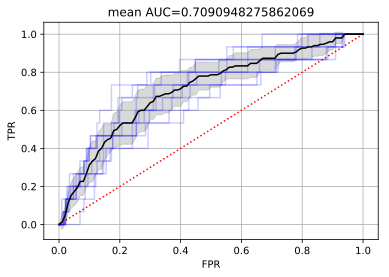

In [12]:
meanauc = plotROCs(allout)

The AUC of the baseline is 0.708 for the mortality task, and 0.713 for the treatment resistance task.

Fifth, put the data into a CSV file for submission to Kaggle.

In [13]:
write_csv_kaggle('mysub_baseline.csv', allout)

<hr>

The above classifier and feature set should be enough to get you started. You can try other classifiers or methods, as well as other features in the CSV file.  Note that some features are categorical, so some additional feature pre-processing might help.  Also, some features are time-series (labeled as "`M##_???`", where `##` are the month numbers (1-36).

A final note on the experiment setup: you shiould not select parameters by cross-validating across the 10 experiment trials, i.e., cross-validation should only be performed inside each experiment trial. Here we are interested in how well a particular method (including the parameter selection method) generalizes across different instances of the dataset.

# YOUR METHODS HERE

## Outline
- Data Pre-processing
    - Remove ignore variables
    - Process Time-robust data
    - Filter variables with too many NaN
    - Imputer: replace NaN cells
        - Simple imputer: replace by "mean", "median", "mode"
        - Imputer model: Latent Factor Model (LFM); IterSVD
    - Data normalization: "l1", "l2", "minmax"
- Classifier training
    - Logistic Regression
    - SVM
    - AdaBoost
    - Neural Network
    - Random Forest
- Solving data imbalance
    - Under sampling
    - Over sampling
        - Inspired by data augmentation
        - SOMTE
        - MSOMTE
        - ANASYN
    - Adapted Algorithms
        - Gradient Boosting Classifier
        - Random Forest (discussion)
    - Anomaly detection
        - DBSCAN
        - Isolated Forest
- Feature selection
    - Manual selection
    - Correlation-based feature selection
        - Spearman's rank correlation
        - Kendall's Tau correlation
    - Model-based feature selection
        - Select by `clf.feature_importance_`
        - Select by `SelectFromModel`
        - Universal feature selection
- Other tricks
    - Model Ensemble
    - Classification by time-sensitive data
        - Process Time-sensitive data
        - Neural Network
            - 1D Convolotional
            - RNN
            - LSTM
            - CNN + RNN/LSTM
        - Distance-based classification
            - Introducing DTW
            - DTW + kNN
            - DTW + MDS + Other classification
            - DTW + anomaly detection
        
---

### 0. Setup running environment

In [13]:
%env KERAS_BACKEND=tensorflow     
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import logging
logging.basicConfig()
import struct

from keras.callbacks import EarlyStopping  
from sklearn.metrics import roc_auc_score
from keras import backend as K

import os
import re
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

env: KERAS_BACKEND=tensorflow


/home/qiurui/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def get_num_col(X,h):
    tmp=np.array(X,dtype='str')
    mask=np.array(tmp==X,dtype='float')
    msk_1d=np.sum(mask,axis=0)
    return np.array([x[0] for x in zip(h,msk_1d) if x[1]==0])

if not os.path.exists("submissions/"):
    os.system("mkdir submissions/") # modify this line if OS mismatch

### 1. Data Preprocessing
#### 1.1. Remove "ignore" variables
- In *mortality_baseline_vars_new.csv*, if the "Ignore" column is 1, then it means that variable is probably not useful or was an intermediate variable of some other analysis.
- The first step is to **remove all "ignore" labels.**

In [15]:
# extract column "Ignore"
df_L_labels = pd.read_csv('mortality/mortality_baseline_vars_new.csv') # put ~_new.csv into the path before running this cell
df_L_labels_array = np.array(df_L_labels)
attr_ignore_idx = df_L_labels_array[:,2]
attr_datatype = df_L_labels_array[:,6]
attr_name = df_L_labels_array[:,0]

In [16]:
# filter attributes
attr_ignore = [] # variables to be removed
attr_useful = [] # variables to be preserved
for i in range(len(attr_name)):
    #if attr_ignore_idx[i] == 1: # remove all "ignore" variables, the standard might be changed later
    if attr_ignore_idx[i] == 1 or attr_datatype[i] == "Nominal": # remove all "ignore" variables and Nominal variables
        attr_ignore.append(attr_name[i])
    elif attr_name[i] in df.columns.values:
        attr_useful.append(attr_name[i])
        
print(len(attr_ignore))
print(len(attr_useful))

1604
653


In [17]:
# extract ground-truth from the dataset
dataY = df['Y'].values[:]
dataX = df[attr_useful].values[:]
print(dataY.shape, dataX.shape)

(1234,) (1234, 653)


#### 1.2. Process Time-robust and Time-sensitive variables
- We split the dataset into two sub-sets:
    - "Time-robust variables" (**normal**): the variables without "Mi" where i is the month index
    - "Time-sensitive variables" (**time**): the continuous data, a batch of variables in the month order
        - Attribute without "M\d" in the name where \d is an integer.
- We use **regular expression** to split the variables by name.

In [18]:
time_series=np.array([x for x in list(attr_useful) if re.match( r'[M]\d+', x) or re.match( r'[a-zA-Z0-9]+_M\d+', x)])
normal=np.setdiff1d(attr_useful,time_series)
normal=np.setdiff1d(normal,['Y'])
dataX_normal = df[normal].values[:]
print(dataX_normal.shape)
print(np.array(df).shape)

(1234, 163)
(1234, 2257)


In [19]:
normal_num_col = get_num_col(dataX_normal,normal)
dataX_normal = df[normal_num_col].values[:]

#### 1.3. Filter attributes with too many NaN values
- Cast the dataset into a numpy array of floating points

In [20]:
dataX_normal_with_mask=np.ma.masked_invalid(np.array(dataX_normal,dtype='float'))
print(np.array(dataX_normal_with_mask.mask,dtype='float').shape)

(1234, 160)


- Plot the number of NaNs in each attribute

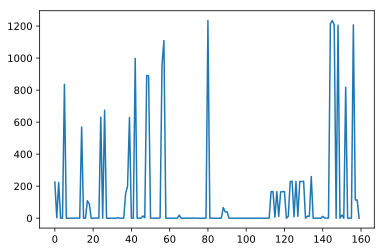

In [21]:
import matplotlib.pyplot as plt
dataX_normal_nan = np.sum(np.array(dataX_normal_with_mask.mask,dtype='float'),axis=0)
plt.plot(dataX_normal_nan)

- Filter variables with too many NaNs (> threshold)

In [22]:
normal_nan_1d=np.array(dataX_normal_nan > 600,dtype='float') # threshold
n=np.sum(normal_nan_1d)
dataX_normal_rm_nan=np.zeros((1234,int(len(normal_nan_1d)-n)))
dataX_normal_rm_nan+=dataX_normal[:,list(np.where(normal_nan_1d==0)[0])]#do not reuse it 
print(dataX_normal_rm_nan.shape)
dataX_normal = dataX_normal_rm_nan

(1234, 144)


#### 1.4. Imputer: relace NaN cells
##### 1.4.1. Simple Imputer
- We can use "Mean", "Median", "Most_frequent (Mode)" imputer here.
- Most-frequent imputer is favorable because it is applicable to nominal data without generating meaningless data.

In [23]:
# imp = preprocessing.Imputer(missing_values=nan, strategy='mean')
# imp = preprocessing.Imputer(missing_values=nan, strategy='median')
imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
trainX_normal = imp.fit_transform(dataX_normal)

##### 1.4.2. Latent Factor Model (LFM)
- Instead of using a simple imputer, we use a parameterized imputer to "learn" the missing values in the dataset.
- LFM is adopted in our experiment.
    - We hypothesize that the original data space X ∈ \R^(n\*m) is the product of two sub-space A ∈ \R^(n\*k) and B ∈ \R^(k\*m).
    - *n* is the number of samples; *k* is the manually defined items; *m* is the number of variables.
    - Our aim is to fit the randomly initialized matrices A & B to fit X such that, ideally, A\*B = X for the non-NaN values.
    - The NaN cells are filled by the values in A\*B.
    - It requires normalization before training LFM.
    - We implement a simple **Gradient Descent** to update the parameter matrics A and B.

In [24]:
# Normalize data matrix with NaN
where_are_NaNs = isnan(dataX_normal)
dataX_tmp = np.copy(dataX_normal)
dataX_tmp[where_are_NaNs] = 0
dataX_column_sum = np.sqrt(np.sum(dataX_tmp**2, axis=0))
dataX_norm_with_nan = np.copy(dataX_normal)
for i in range(len(dataX_column_sum)):
    dataX_norm_with_nan[:,i] /= dataX_column_sum[i]

In [26]:
# Define LFM model
def LFM(A, K_dim, n_iter, init_lr, penalty, loss_break):
    '''
    Act as a imputer in our solution
    return a matrix [P*Q].shape = [A].shape
    no NaN in [P*Q]
    '''
    # initialization
    P = np.random.rand(A.shape[0],K_dim)
    Q = np.random.rand(K_dim,A.shape[1])
    lr = init_lr
    loss_prev = 1000000
    # iteration
    for step in range(n_iter):
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                if not np.isnan(A[i][j]):
                    diff_ij = A[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K_dim): # update parameter with BP
                        P[i][k] += lr * (diff_ij * Q[k][j] - penalty * P[i][k])
                        Q[k][j] += lr * (diff_ij * P[i][k] - penalty * Q[k][j])
        # Ap = np.dot(P,Q)
        loss = 0
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                if A[i][j] > 0:
                    loss += (A[i][j] - np.dot(P[i,:],Q[:,j]))**2
                    for k in range(K_dim):
                        loss += (penalty/2) * (P[i][k]**2 + Q[k][j]**2)
        print("Iteration",step+1,", Loss =",loss)
        if loss_prev - loss < loss_break:
            break
        loss_prev = loss
        lr = init_lr * (0.9**(step/30))
        
    # return P*Q (shape = A.shape, without NaN)
    return np.dot(P,Q)

In [28]:
# Run LFM imputer
dataX_lfm = LFM(dataX_norm_with_nan, 12, 1000, 0.002, 0.0002, 1)

Iteration 1 , Loss = 6203.62793091526
Iteration 2 , Loss = 4175.98239354663
Iteration 3 , Loss = 2878.749118725007
Iteration 4 , Loss = 2024.1930741943197
Iteration 5 , Loss = 1448.4651735306388
Iteration 6 , Loss = 1054.0865367273848
Iteration 7 , Loss = 780.4810564661254
Iteration 8 , Loss = 588.749539396481
Iteration 9 , Loss = 453.28562734174653
Iteration 10 , Loss = 356.9108812076188
Iteration 11 , Loss = 287.9302041677719
Iteration 12 , Loss = 238.28846851278252
Iteration 13 , Loss = 202.385218703853
Iteration 14 , Loss = 176.2961977498384
Iteration 15 , Loss = 157.25339425921305
Iteration 16 , Loss = 143.2930577400579
Iteration 17 , Loss = 133.0148134156305
Iteration 18 , Loss = 125.41532698878477
Iteration 19 , Loss = 119.77258218255032
Iteration 20 , Loss = 115.56485179778129
Iteration 21 , Loss = 112.4136418538246
Iteration 22 , Loss = 110.0433145401603


KeyboardInterrupt: 

- We tried **Iterative SVD** as well.

```python
import scipy
def SVD_imputer(A, nan_mask, threshold):
    print(nan_mask)
    loss = inf
    diff = inf
    iteration = 0
    while(diff>threshold):
        iteration += 1
        u, s, vt = scipy.sparse.linalg.svds(A)
        s = np.diag(s)
        A_ = np.dot(np.dot(u,s),vt)
        loss = np.sum(np.square(A_-A))
        diff = np.sum(np.square((A_-A)*nan_mask))
        print("Iteration",iteration,"Loss =",loss,"Diff =",diff)
        A = A*(1-nan_mask) + A_*nan_mask
    return A
nan_mask = np.array(np.ma.masked_invalid(dataX_normal).mask,dtype=int)
dataX = SVD_imputer(trainX_normal,nan_mask,0.0001)
```

- However, Iterative SVD **does not converge**.
- In fact, Iterative SVD does not logically make sense, although they have similar optimization target

#### 1.5 Data normalization without NaN
- Here we may try "l2", "l1", "minmax".
- We use L2 norm here. L1 is also acceptable.

In [25]:
trainX_normal = np.array(preprocessing.normalize(trainX_normal, norm='l2', axis=0, copy=True, return_norm=True)[0])

- Generate dataset from the normalized data

In [26]:
dataY = df['Y'].values[:]
dataX = trainX_normal
print(dataY.shape, dataX.shape)

(1234,) (1234, 144)


### 2. Classifier Training
- We tried multiple classifiers:
    - Logistic Regression (baseline)
    - SVM
    - AdaBoost
    - Neural Network
    - Random Forest
- Experiment suggests that Random Forest (RF) is the best model for the given task.

#### 2.1. Logistic Regression (LR)
- Define functions

In [27]:
def LR_cv_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def LR_classifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    cla = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, 
                                            scoring='roc_auc')
    # fit the classifier
    cla.fit(trainXi, trainY)
    # predict the scores, and return them
    testYscores = cla.predict_proba(testXi)[:,1]
    return(testYscores)

- Run LR experiment, plot figure, output predictions

*** CV 0: test auc = 0.8005747126436782
*** CV 1: test auc = 0.8344827586206897
*** CV 2: test auc = 0.8304597701149425
*** CV 3: test auc = 0.6956896551724138
*** CV 4: test auc = 0.8017241379310345
*** CV 5: test auc = 0.835919540229885
*** CV 6: test auc = 0.7218390804597701
*** CV 7: test auc = 0.7494252873563217
*** CV 8: test auc = 0.7307471264367817
*** CV 9: test auc = 0.7692528735632185


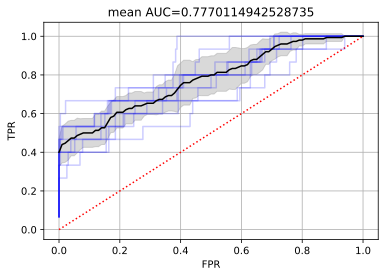

In [32]:
allout = LR_cv_experiment(LR_classifier, dataX)
meanauc = plotROCs(allout)
write_csv_kaggle('submissions/output_LR.csv', allout)

#### 2.2. SVM
- RBF kernel

In [28]:
def SVM_cv_experiment(clf, X, gamma=0.1):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, gamma)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def SVM_classifier(trainX, trainY, testX, gamma_value):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the SVM classifier -- maximize AUC when doing the cross-validation
    clf = svm.SVC(probability=True, kernel='rbf', gamma=gamma_value, C=5)
    # fit the classifier
    clf.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testXi)[:,1]
    return(testYscores)

In [ ]:
gamma_list = [0.01,0.03,0.1]
for gamma_value in gamma_list:
    allout = SVM_cv_experiment(SVM_classifier, dataX, gamma=gamma_value)
    plotROCs(allout)
    write_csv_kaggle('submissions/output_SVM_rbf_gamma='+str(gamma_value)+'.csv', allout)

- Polynomial kernel

In [29]:
def SVM_cv_experiment(clf, X, gamma=0.1):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, gamma)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def SVM_classifier(trainX, trainY, testX, gamma_value):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the SVM classifier -- maximize AUC when doing the cross-validation
    clf = svm.SVC(probability=True, kernel='poly', gamma=gamma_value, C=5)
    # fit the classifier
    clf.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testXi)[:,1]
    return(testYscores)

In [ ]:
gamma_list = [0.1,0.3,1,3,10]
for gamma_value in gamma_list:
    allout = SVM_cv_experiment(SVM_classifier, dataX, gamma=gamma_value)
    plotROCs(allout)
    write_csv_kaggle('submissions/output_SVM_poly_gamma='+str(gamma_value)+'.csv', allout)

#### 2.3. AdaBoost

In [30]:
def adaboost_cv_experiment(clf, X, estimator=1):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def adaboost_classifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the AdaBoost classifier
    paramgrid = {'n_estimators': array([1, 2, 3, 5, 10, 15, 20, 25, 50, 100, 200, 500, 1000,2000,3000,5000])}
    adacv = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(random_state=4487),paramgrid, cv=5, n_jobs=-1)
    # fit the classifier
    adacv.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = adacv.predict_proba(testXi)[:,1]
    return(testYscores)

In [ ]:
allout = adaboost_cv_experiment(adaboost_classifier, dataX)
plotROCs(allout)
write_csv_kaggle('submissions/output_AdaBoost.csv', allout)

#### 2.4. Neural Network
- In this section, we use a fully connected network to fit our dataset.
- We believe CNN is not applicable to this problem because, compared with image data, the "local information" in each sample is meaningless. The order of the attributes does not matter. All the (normal) variables are independent.
- For better performance, we tried different combinations of FC layers and normalization techniques.
- The hyperparameters are well tuned.

In [31]:
def nn_cv_experiment(clf, X, epoch_num=20, lr=0.01):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        
        
        trainX = X[train_index]
        trainY = dataY[train_index].reshape((-1,1))
        testX  = X[test_index]
        testY  = dataY[test_index].reshape((-1,1))
        
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, epoch_num, lr)

        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def nn_classifier(trainX, trainY, testX, epoch_num, learning_rate):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    N=int(len(trainX))
    
    nn=Sequential()
    nn.add(Dense(units=256, activation='relu'))
    nn.add(Dropout(0.5,seed=45))
    nn.add(Dense(units=256, activation='relu'))
    nn.add(Dropout(0.5,seed=46))
    nn.add(Dense(units=256, activation='relu'))
    nn.add(Dropout(0.5,seed=47))
    nn.add(Dense(units=256, activation='relu'))
    nn.add(Dropout(0.5,seed=48))
    nn.add(Dense(units=2, activation='softmax'))
    nn.compile(loss=keras.losses.sparse_categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True), 
           metrics=['accuracy'])
    history = nn.fit(trainX, np.array(trainY,dtype='int'), epochs=epoch_num, batch_size=50, verbose=False)
    
    # predict the scores, and return them
    testYscores = nn.predict_proba(testX)[:,1]
    return(testYscores)

In [ ]:
lr_list = [0.01,0.02,0.05]
for lr in lr_list:
    allout = nn_cv_experiment(nn_classifier, dataX, epoch_num=20, lr=lr)
    plotROCs(allout)
    write_csv_kaggle('submissions/output_NN_lr='+str(lr)+'.csv', allout)

#### 2.5. Random Forest
- For RF, we believe that the tree number is a key factor. RF with a large number of estimators always tend to give good result.
- We also tried different weight because the positive and negative samples are imbalanced in the dataset. But seems it is not very helpful.

In [32]:
def RF_plotROCs(allout, title):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std
    print("mean Acu = "+str(meanauc))
    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title(title+' mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

def RF_cv_experiment(clf, X, tree):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, tree)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def RF_classifier(trainX, trainY, testX, tree):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testXi)[:,1]
    return(testYscores)

In [ ]:
tree_num_range = [50,200,1000,2000,5000]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier, dataX, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/output_LR_'+str(tree_num)+'.csv', allout)

#### Section 2 Conclusion 
- Random Forest with a large number of estimators is the best classifier for the given task.
- This might reflect that the data is not properly linear seperated, and hence, as it would be discussed in the next section, the inbalance nature of the data might also account for the outstanding performance of random forest.
- **We will use RF as the default classifier for the experiment below**.

### 3. Solving data inblance learning

- Directly deploy classifiers on the data is not desiralbe. This might be caused by the limitation of the nature of the data set. It is abvious that there are only 73 positive samples while over 1000 negative samples. Therefore, with these limited positive samples would make the model less specific or too general. For example, for every sample predict negative, over 93% accuracy would be detected but the roc-auc score is low. Therefore, we have to make the model more specifc to the positive samples.

#### 3.1. Under sampling
- One trick to solve the imbalance problem is to undersampling the surfit samples, in this case that is to randomly delete the negative samples so that the population of those two classes would be comparable. However since there are only 58 which might not be enough to perform further classifier so it is first abandoned. A simple test is performed below, and it turns out that the under sampling could not be used.

In [33]:
def RF_classifier_under(trainX, trainY, testX, tree):
    trainX_new = (trainX)
    testX_new = (testX)
    kmeans=cluster.KMeans(n_clusters=100,random_state=4487)
    kmeans.fit(trainX_new[trainY==0,:])
    tmpX=kmeans.cluster_centers_
    trainXi=trainX_new[trainY==1,:]
    trainYi=trainY[trainY==1]
    trainXi = append(trainXi,tmpX,axis=0)
    trainYi = append(trainYi,array([0]*100).T,axis=0)
    # classifier training
    clf = linear_model.LogisticRegressionCV(Cs=logspace(-5,4,21), n_jobs=-1)
    clf.fit(trainXi, trainYi)
    testYscores = clf.predict_proba(testX_new)[:,1]
    return(testYscores)

mean Acu = 0.730316091954023


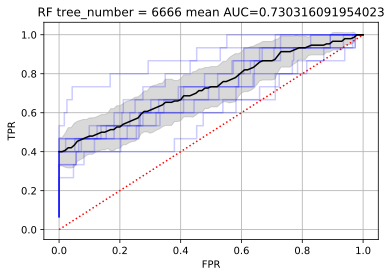

In [35]:
tree_num_range = [6666]

# for i in range(len(dataXs)):
for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_under, dataX, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/RF8.0_top'+str(tree_num)+'_937var.csv', allout)

#### 3.2. Over sampling
- Another solution focuses itself on the opposite way, that is to over sample the positive data, so that the model would eliminate the underfitting problems and make the model more specific to the positive samples. 

#### 3.2.1. Inspired by data augmentation
- Similar to the image data clinical data is also with noises so it is acceptable to use some similar trick to generate more positive data. In this projrct, we add normal distributed noise to the original samples.

In [42]:
random.seed(1018)
def RF_classifier_aug(trainX, trainY, testX, tree):
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    trainXi=trainX
    trainYi=trainY
    for k in range(3*int(mul)):
        trainXi = append(trainXi,(trainX[trainY==1]+random.randn(trainX[trainY==1].shape[0],trainX[trainY==1].shape[1])*0.001),axis=0)
        trainYi = append(trainYi,(trainY[trainY==1]),axis=0)
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=6666, n_jobs=-1)
    clf.fit(trainXi, trainYi)
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX)[:,1]
    return(testYscores)

mean Acu = 0.8122844827586206


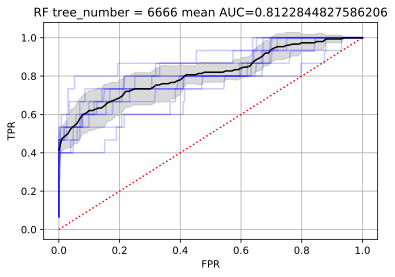

In [43]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_aug, dataX, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_'+str(tree_num)+'_impute_baseliner.csv', allout)

this augmentation-like technique helps a lot which means that, the inbalnce nature is one of bottle necks for classification, and the model should be tunned to be more specific to the positive data. 

#### 3.2.2. SMOTE
- There is some other avaliable algorithms for oversampling. The most well-known one is called SMOTE, it considers the closness between all pairs of the positive samples, and for each pair of positive samples the augmented samples are on the the line of them. In addition, this algorithm is available in the libarary called <i>imblearn</i> 

In [44]:
from imblearn.over_sampling import SMOTE

def RF_classifier_smote(trainX, trainY, testX, tree):
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    sm = SMOTE()
    X_resampled, y_resampled = sm.fit_sample(trainX, trainY)
    trainXi=X_resampled
    trainYi=y_resampled
    for k in range(2):
        trainXi = append(trainXi,(trainXi[trainYi==1]+random.randn(trainXi[trainYi==1].shape[0],trainXi[trainYi==1].shape[1])*0.001),axis=0)
        trainYi = append(trainYi,(trainYi[trainYi==1]),axis=0)
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX)[:,1]
    return(testYscores)

mean Acu = 0.7918103448275862


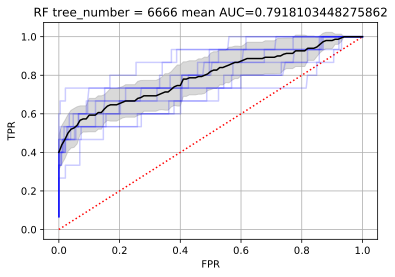

In [45]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_smote, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_somte'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 3.2.3. MSMOTE
- In addition, there is a modified SMOTE algorithm, called MSMOTE implemented in *imblearn.combine.SMOTEENN*, it consider differetn number of neighbors so that the added samples is not subjected to the line between them. 

In [46]:
from imblearn.combine import SMOTEENN

def RF_classifier_smoteen(trainX, trainY, testX, tree):
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    sm = SMOTEENN(n_neighbors=1)
    X_resampled, y_resampled = sm.fit_sample(trainX, trainY)
    trainXi=X_resampled
    trainYi=y_resampled
    for k in range(2):
        trainXi = append(trainXi,(trainXi[trainYi==1]+random.randn(trainXi[trainYi==1].shape[0],trainXi[trainYi==1].shape[1])*0.001),axis=0)
        trainYi = append(trainYi,(trainYi[trainYi==1]),axis=0)
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)   
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX)[:,1]
    return(testYscores)

mean Acu = 0.7943103448275861


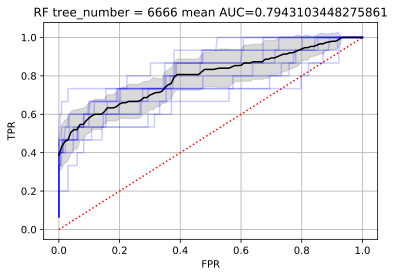

In [47]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_smoteen, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_somte'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 3.2.4. Adasyn
- This method deploy adaboosting for the goal of data oversampling, and it is available in *imblearn.over_sampling.ADASYN*

In [52]:
random.seed(1018)
    
from imblearn.over_sampling import ADASYN

def RF_classifier_adasyn(trainX, trainY, testX, tree):   
    sm = ADASYN(n_neighbors=1)
    X_resampled, y_resampled = sm.fit_sample(trainX, trainY)
    trainXi=X_resampled
    trainYi=y_resampled
    for k in range(2):
        trainXi = append(trainXi,(trainXi[trainYi==1]+random.randn(trainXi[trainYi==1].shape[0],trainXi[trainYi==1].shape[1])*0.001),axis=0)
        trainYi = append(trainYi,(trainYi[trainYi==1]),axis=0)
    print(trainXi.shape)
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX)[:,1]
    return(testYscores)

(4617, 144)
(4697, 144)
(4661, 144)
(4593, 144)
(4617, 144)
(4593, 144)
(4617, 144)
(4617, 144)
(4633, 144)
(4593, 144)
mean Acu = 0.8000574712643678


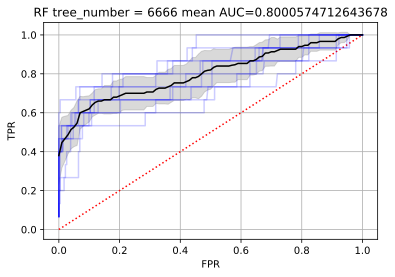

In [53]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_adasyn, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_somte'+str(tree_num)+'_impute_baseliner.csv', allout)

The above exisitng algorithm turns out to be less preferred than the augmentation technique. This which means that this existing solution might not be specific enough. Since they focus more to genera;ize the model rather than make it more specific to some classes.

#### 3.3. Adapted algorithms
- in addition, there are some algorithms with good performance, below thet are tried.

#### 3.3.1. Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
random.seed(1018)
def gb_classifier(trainX, trainY, testX, tree):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = ensemble.GradientBoostingClassifier(n_estimators=tree, random_state=1234,learning_rate=0.0001)
    # fit the classifier
    clf.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testXi)[:,1]
    return(testYscores)

mean Acu = 0.7684482758620689


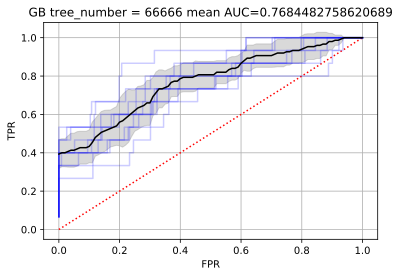

In [58]:
tree_num_range = [66666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(gb_classifier, dataX, tree_num)
    meanauc = RF_plotROCs(allout, "GB tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/GB_'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 3.3.2. Random forest
- It is so lucky for us that initially, we choose Rondom foret as the one to be tried since it is more robust in inbalanced data learning.

#### 3.4. Anomaly detection
- For this unusual scenario, an unconventional perspection could help. Since the positive samples are so rare that it could be regarded as outlier as well. Therefore, some anomaly detection algorithms could be tried. For example, DBSCAN and Isolation Forest

#### 3.4.1. DBSCAN

In [59]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.1,min_samples=23,metric="cityblock")
tmp=dbscan.fit_predict(dataX)
t,c=unique(dataY,return_counts=True)
print(t,c)
r=[]
print(unique(tmp,return_counts=True))
for i in range(len(tmp)):
    if tmp[i] == -1:
        #print(dataY[i])
        r.append(dataY[i])
print(len(r))      
sum(r)
print(sum(dataY[tmp==-1]))

[0 1] [1161   73]
(array([-1,  0]), array([313, 921]))
313
32


- However, no matter how the parameters change positive samples could not be deteced as outlier. Therefore, DBSCAN is not used.

#### 3.4.2. Isolation Forest

In [60]:
from sklearn.ensemble import IsolationForest
IF=IsolationForest(n_estimators=8000,max_features=0.618)

IF.fit(dataX)
tmp=IF.predict(dataX)
t,c=unique(dataY,return_counts=True)
print(t,c)
r=[]
print(unique(tmp,return_counts=True))
for i in range(len(tmp)):
    if tmp[i] == -1:
        #print(dataY[i])
        r.append(dataY[i])
print(len(r))      
sum(r)
print(sum(dataY[tmp==-1]))

[0 1] [1161   73]
(array([-1,  1]), array([ 124, 1110]))
124
15


- However, no matter how the parameters change positive samples could not be deteced as outlier. Therefore, Isolation Forest is not used.

This could also accounted by the nature that the data is not perfectly linearly saperatable and the density is not really ineven enoudh for both rbf kernal anf the dbscan

### 4. Feature Selection
#### 4.1. Manual feature selection
- According to our experiment, data-sensitive variables has a low correlation with the prediction, so we directly remove the data-sensitive columns.
- Nominal data is not performing well, and nominal data cannot be directly normalized. For simplicity and better performance, we remove all Nominal columns as well.
- Above logic is applied to **Section 1, 2**. We achieved a reasonably good result with time-robust continuous variables.
---
- With manual selection, we pick up 144 variables for classifier training, as shown in **Section 1, 2**.

### 4.2. Correlation Based Feature Selection 

#### 4.2.1. Pearson Correlation
- The most popular correlation is pearson correlation, so it is first tried.

In [67]:
import scipy.stats as stats
random.seed(1018)
def RF_classifier_pea(trainX, trainY, testX, tree):
    
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    taus=[]
    for j in range(trainX.shape[1]):
        tau, p_value = stats.pearsonr(trainY.T, trainX[:,j].T)
        taus.append(tau)
        #print(tau)
    taus=array(taus)
    print(argmax(sort(abs(taus))[1:]/sort(abs(taus[:-1]))),(max(sort(abs(taus))[1:]/sort(abs(taus[:-1])))))
    idxs=argsort(abs(taus))[-120:]
    
    #lsvc = LinearSVC(C=10, penalty="l1", dual=False).fit(trainX, trainY)
    #model = SelectFromModel(lsvc, prefit=True)
    trainX_new = (trainX[:,idxs])
    print(trainX_new.shape)
    testX_new = (testX[:,idxs])
    trainXi=trainX_new
    trainYi=trainY
    for k in range(3*int(mul)):
        #trainXi = append(trainXi,(trainX_new[trainY==1]+random.randn(trainX_new[trainY==1].shape[0],trainX_new[trainY==1].shape[1])*0.001),axis=0)
        trainXi = append(trainXi,(trainX_new[trainY==1]+random.randn(trainX_new[trainY==1].shape[0],trainX_new[trainY==1].shape[1])*0.002),axis=0)
        trainYi = append(trainYi,(trainY[trainY==1]),axis=0)
    # setup the RF classifier -- maximize AUC when doing the cross-validation
     # use a model to select features!!!!!!!!!!!!!!!
    
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX_new)[:,1]
    return(testYscores)

0 23320057491629.6
(987, 120)
0 37325152448124.21
(987, 120)
0 132229228206176.4
(987, 120)
0 22914019204168.914
(987, 120)
0 47517909028521.12
(987, 120)
0 34411544797316.016
(987, 120)
0 1436211318403.792
(987, 120)
0 5535616593996.462
(987, 120)
0 3700732652668.9897
(987, 120)
0 9442583124553.953
(987, 120)
mean Acu = 0.8115373563218391


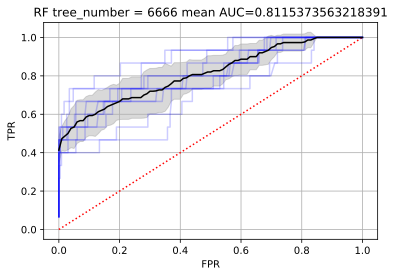

In [68]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_pea, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_aug_spr_ak2'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 4.2.2. Spearman Correlation
- As shown above the pearson corraltion is not desirable, which means that a linear correlation is not expected. Therefore, we turn to other correlation such as Spearman Correlation.

In [71]:
import scipy.stats as stats
random.seed(1018)
def RF_classifier_spr(trainX, trainY, testX, tree):
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    taus=[]
    for j in range(trainX.shape[1]):
        tau, p_value = stats.spearmanr(trainY.T, trainX[:,j].T)
        taus.append(tau)
    taus=array(taus)
    print(argmax(sort(abs(taus))[1:]/sort(abs(taus[:-1]))),(max(sort(abs(taus))[1:]/sort(abs(taus[:-1])))))
    idxs=argsort(abs(taus))[-120:]
    trainX_new = (trainX[:,idxs])
    print(trainX_new.shape)
    testX_new = (testX[:,idxs])
    trainXi=trainX_new
    trainYi=trainY
    for k in range(2*int(mul)):
        #trainXi = append(trainXi,(trainX_new[trainY==1]+random.randn(trainX_new[trainY==1].shape[0],trainX_new[trainY==1].shape[1])*0.001),axis=0)
        trainXi = append(trainXi,(trainX_new[trainY==1]+random.randn(trainX_new[trainY==1].shape[0],trainX_new[trainY==1].shape[1])*0.002),axis=0)
        trainYi = append(trainYi,(trainY[trainY==1]),axis=0)
    # setup the RF classifier -- maximize AUC when doing the cross-validation
     # use a model to select features!!!!!!!!!!!!!!!
    
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX_new)[:,1]
    return(testYscores)

/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 1.2792111571360154
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 2.824829014805261
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 24.707571756972623
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 2.2752223909245988
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 12.86979151267198
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 1.445190550554179
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 3.080043031582242
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 4.726822046190526
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 1.6255459948118045
(987, 120)


/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/qiurui/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/qiurui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


142 2.220234359005782
(987, 120)
mean Acu = 0.8109339080459769


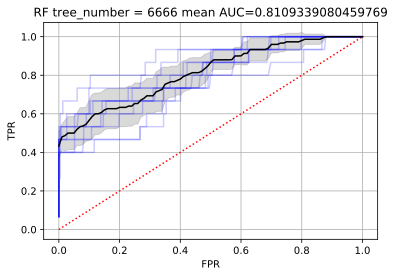

In [72]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_spr, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_aug_spr_ak2'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 4.2.3. Kendall Tau's Correlation 
- In addition, another non-linear correlation is refered, that is kendall tau's correlation. It is similar to Spearman correlation that they focus more on the ranking rather than the ratio so that more suitable for a non-linear dataset

In [73]:
import scipy.stats as stats
random.seed(1018)
def RF_classifier_tau(trainX, trainY, testX, tree):
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    taus=[]
    for j in range(trainX.shape[1]):
        tau, p_value = stats.kendalltau(trainY.T, trainX[:,j].T)
        taus.append(tau)
        #print(tau)
    taus=array(taus)
    print(argmax(sort(abs(taus))[1:]-sort(abs(taus[:-1]))),(max(sort(abs(taus))[1:]-sort(abs(taus[:-1])))))
    idxs=argsort(abs(taus))[-100:]
    
    trainX_new = (trainX[:,idxs])
    print(trainX_new.shape)
    testX_new = (testX[:,idxs])
    trainXi=trainX_new
    trainYi=trainY
    for k in range(3*int(mul)):
        trainXi = append(trainXi,(trainX_new[trainY==1]+random.randn(trainX_new[trainY==1].shape[0],trainX_new[trainY==1].shape[1])*0.002),axis=0)
        trainYi = append(trainYi,(trainY[trainY==1]),axis=0)
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainYi)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX_new)[:,1]
    return(testYscores)

142 0.001992287644657153
(987, 100)
142 0.0007156076726378209
(987, 100)
142 0.0010826916278277752
(987, 100)
142 0.002376403530398105
(987, 100)
142 0.002941920266083045
(987, 100)
142 0.002161732593610838
(987, 100)
142 0.0020583027548395673
(987, 100)
142 0.003996601161293874
(987, 100)
142 0.003151973148629913
(987, 100)
142 0.0017994549204231672
(987, 100)
mean Acu = 0.8100287356321839


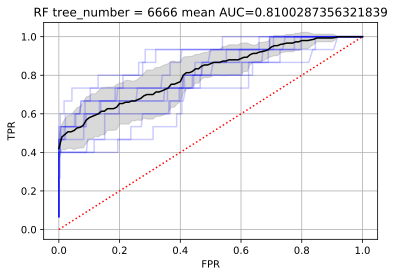

In [74]:
tree_num_range = [6666]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier_tau, trainX_normal, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))
    write_csv_kaggle('submissions/LR4_aug_tau_all'+str(tree_num)+'_impute_baseliner.csv', allout)

#### 4.3. Feature Selection Models
- In this section, we will introduce some feature selection models other than the classifiers.
- These models are implemented in Scikit-Learn already.
- Reference: [sklearn Official Documentation](https://scikit-learn.org/stable/modules/feature_selection.html)

#### 4.3.1 Select attributes by classifier weights
- In this section, we will use the feature importance from the classifier to select the features.
- Firstly, we train a RF classifier. `clf`
- Next, we extract the feature importance from the classifier. `clf.feature_importances_`
- Then, we pick up the top *k* attributes from the classifier.

- Train a classifier and select the top-k important features

In [ ]:
def RF_plotROCs(allout, title):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std
    print("mean Acu = "+str(meanauc))
    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title(title+' mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

def RF_cv_experiment(clf, X, tree):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # evaluate the importance of attributes
    importance_dict = {}
    attr_num = X.shape[1]
    
    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores, importances, indices = clf(trainX, trainY, testX, tree)
        
        for i in range(attr_num):
            if indices[i] in importance_dict:
                importance_dict[indices[i]] += importances[i]
            else:
                importance_dict[indices[i]] = importances[i]
        
        
        
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
    
    # sort all attributes by importance
    importances = []
    for i in range(attr_num):
        importances.append(importance_dict[i])
    indices = np.argsort(importances)[::-1]
    
    # return all the information
    return allout, indices

def RF_classifier(trainX, trainY, testX, tree):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainX, trainY)
    
    # ===============
    # feature importance analysis
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # ===============
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX)[:,1]
    return testYscores, importances, indices

- Print the features:

In [ ]:
allout, indices = RF_cv_experiment(RF_classifier, dataX, 666)
print(indices)

- Then, we pick up top-k variables to train another classifier.

In [ ]:
def RFsub_cv_experiment(clf, X, tree, attr_list):
    
    X = X[:,attr_list]
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, tree)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

def RFsub_classifier(trainX, trainY, testX, tree):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    # fit the classifier
    clf.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = clf.predict_proba(testXi)[:,1]
    return(testYscores)

- The final classifier:

In [ ]:
for top_n in [100]: #range(10,144,10):
    print("attr_num",top_n)
    allout = RFsub_cv_experiment(RFsub_classifier, dataX, 5000, indices[:top_n])
    meanauc = RF_plotROCs(allout, "RF attr_num = "+str(top_n))

#### 4.3.2. Select from model
- "Select from model" use the same idea as **Section 3.2.**. It use `feature_importances_` to select features.
- We tried **L1-based feature selection** and **Tree-based feature selection** in this subsection.

In [ ]:
def RF_plotROCs(allout, title):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std
    print("mean Acu = "+str(meanauc))
    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title(title+' mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

def RF_cv_experiment(clf, X, tree):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, tree)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
    return(allout)


def RF_classifier(trainX, trainY, testX, tree):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)

    # use a model to select features
    lsvc = LinearSVC(C=10, penalty="l1", dual=False).fit(trainX, trainY) # L1-based
    # lsvc = ExtraTreesClassifier(n_estimators=50).fit(trainX, trainY) # Tree-based
    model = SelectFromModel(lsvc, prefit=True)
    trainX_new = model.transform(trainX)
    testX_new = model.transform(testX)
    print(testX_new.shape)
    
    # fit the classifier
    clf.fit(trainX_new, trainY)
    # predict the scores, and return them
    testYscores = clf.predict_proba(testX_new)[:,1]
    return(testYscores)

In [ ]:
tree_num_range = [200]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier, dataX, tree_num)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))

#### 4.3.3. Universal Feature Selection
- In this subsection, we "selecting the best features based on univariate statistical tests".
- We invoke an API `sklearn.feature_selection.SelectKBest`. It selects the best K features from the dataset.
- For the selection criteria, we tried three versions:
    - Chi-squared stats of non-negative features for classification tasks.
    - ANOVA F-value between label/feature for classification tasks. (Achieves the best performance in our dataset)
    - Mutual information for a discrete target.
- To cover more possibilities, our raw input for this method is not the manually-selected 144 attributes.
    - Instead, we use all 937 attributes (remove "ignore" labels)

- Re-run data preprocessing to pick up the 937 attributes and select the top-360 attributes.

In [ ]:
df_L_labels = pd.read_csv('mortality/mortality_baseline_vars_new.csv')
df_L_labels_array = np.array(df_L_labels)
attr_ignore_idx = df_L_labels_array[:,2]
attr_datatype = df_L_labels_array[:,6]
attr_name = df_L_labels_array[:,0]
attr_ignore = []
attr_useful = []
for i in range(len(attr_name)):
    if attr_ignore_idx[i] == 1:# or attr_datatype[i] == "Nominal":
        attr_ignore.append(attr_name[i])
    elif attr_name[i] in df.columns.values:
        attr_useful.append(attr_name[i])
        
print(len(attr_ignore))
print(len(attr_useful))

dataY = df['Y'].values[:]
dataX = df[attr_useful].values[:]

time_series=np.array([])#x for x in list(attr_useful) if re.match( r'[M]\d+', x) or re.match( r'[a-zA-Z0-9]+_M\d+', x)])
normal=np.setdiff1d(attr_useful,time_series)
normal=np.setdiff1d(normal,['Y'])
dataX_normal = df[normal].values[:]

normal_num_col = get_num_col(dataX_normal,normal)
dataX_normal = df[normal_num_col].values[:]

dataX_normal_with_mask=np.ma.masked_invalid(np.array(dataX_normal,dtype='float'))

import matplotlib.pyplot as plt
dataX_normal_nan = np.sum(np.array(dataX_normal_with_mask.mask,dtype='float'),axis=0)
plt.plot(dataX_normal_nan)

normal_nan_1d=np.array(dataX_normal_nan > 400,dtype='float')
n=np.sum(normal_nan_1d)
dataX_normal_rm_nan=np.zeros((1234,int(len(normal_nan_1d)-n)))
dataX_normal_rm_nan+=dataX_normal[:,list(np.where(normal_nan_1d==0)[0])]
dataX_normal = dataX_normal_rm_nan

imp = preprocessing.Imputer(missing_values=nan, strategy='mean')
trainX_normal = imp.fit_transform(dataX_normal)

trainX_normal = np.array(preprocessing.normalize(trainX_normal, norm='l2', axis=0, copy=True, return_norm=True)[0])

dataY = df['Y'].values[:]
dataX = trainX_normal
dataX = SelectKBest(f_classif, k=360).fit_transform(dataX, dataY) # feature selection
print(dataY.shape, dataX.shape)

- Train a Random Forest classifier with oversampling

In [ ]:
def RF_cv_experiment(clf, X, tree):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, tree)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

random.seed(1018)
def RF_classifier_aug(trainX, trainY, testX, tree):
    
    mul= len(trainX[trainY==0])/len(trainX[trainY==1])
    trainXi=trainX
    trainYi=trainY
    for k in range(3*int(mul)):
        trainXi = append(trainXi,(trainX[trainY==1]+random.randn(trainX[trainY==1].shape[0],trainX[trainY==1].shape[1])*0.001),axis=0)
        trainYi = append(trainYi,(trainY[trainY==1]),axis=0)
        
    clf = ensemble.RandomForestClassifier(n_estimators=tree, random_state=1234, n_jobs=-1)
    clf.fit(trainXi, trainYi)
    
    testYscores = clf.predict_proba(testX)[:,1]
    return(testYscores)

In [ ]:
allout = RF_cv_experiment(RF_classifier_aug, dataX, 6666)
meanauc = RF_plotROCs(allout, "RF top-360 features")
write_csv_kaggle('submissions/output_RF_top-360_937vars.csv', allout)

### 5. Other tricks

#### 5.1. Model Ensemble
- We tried to ensemble several random forests with different tree numbers/random states.
- The cell below shows an example of our model ensemble.

In [ ]:
def RF_plotROCs(allout, title):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std
    print("mean Acu = "+str(meanauc))
    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title(title+' mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

def RF_cv_experiment(clf, X, tree, num_model):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope sil1nce these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX, tree, num_model)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
    return(allout)


def RF_classifier(trainX, trainY, testX, tree, num_model):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # setup the RF classifier -- maximize AUC when doing the cross-validation
    clf = []
    for i in range(num_model):
        clf.append(ensemble.RandomForestClassifier(n_estimators=tree, random_state=i, n_jobs=-1))

    testYscores = np.zeros((len(testX)),dtype='float')
    # fit the classifier
    # predict the scores, and return them
    for model in clf:
        model.fit(trainX, trainY)
        testYscores += model.predict_proba(testX)[:,1]
        
    return(testYscores)

In [75]:
tree_num_range = [200]

for tree_num in tree_num_range:
    allout = RF_cv_experiment(RF_classifier, dataX, tree_num, 10)
    meanauc = RF_plotROCs(allout, "RF tree_number = "+str(tree_num))

TypeError: RF_cv_experiment() takes 3 positional arguments but 4 were given

#### 5.2. Time series
- to use the time series, there are some different methods. However,this type of data is relatively complicated, so NNs are tried. 

#### 5.2.0. time series preprocessing

In [76]:
na_values = [777, 888, 999, '777', '888', '999']
na_values = [777, 888, 999, '777', '888', '999',' ']
if (doMortality):
    ### load the data on mortality ###################################################
    df_X = pd.read_csv('mortality/mortality_suicide.csv', na_values=na_values)
    df_L = pd.read_csv('mortality/mortality_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('mortality/mortality_baseline_vars.csv', na_values=na_values)

    # get the labels and HCScode (subject IDs)
    df_suic = df_X[['HCScode', 'Suicide_12']]    
    # select data_L by HCScodes in subj_suic
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_suic['HCScode'])]
    # merge data, and sort
    df = df_suic.set_index('HCScode').join(df_L_part.set_index('HCS_code'))
    # sort by HCScode
    df = df.sort_values("HCScode")
    # rename class variable name
    df.rename(index=str, columns={'Suicide_12': 'Y'}, inplace=True)
    
else:
    ### load the data on treatment resistance #########################################
    df_X = pd.read_csv('treatres/clozapine_tr.csv', na_values=na_values)
    df_L = pd.read_csv('treatres/clozapine_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('treatres/clozapine_baseline_vars.csv', na_values=na_values)

    # get HCS codes and labels
    df_tr = df_X[['HCS3', 'TR_nonTR_Inclusive']]
    # select data_L by available codes
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_tr['HCS3'])]
    # merge data
    df = df_tr.set_index('HCS3').join(df_L_part.set_index('HCS_code'))
    # remove nan values, and sort
    df = df[(df.TR_nonTR_Inclusive >= 0)].sort_values("HCS3")
    # rename class variable name
    df.rename(index=str, columns={'TR_nonTR_Inclusive': 'Y'}, inplace=True)
    df['Y'] = df['Y'].astype(int)

/home/qiurui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1009,1010,1011,1012,1013,1014,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1040,1041,1042,1043,1044,1823,1824,1825,1826,1939,1940,1948,1949,1957,1958,1966,1967,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
if (doMortality):
    # load cross-validation sets for Mortality data
    tmp = pd.read_csv('mortality/mortality_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('mortality/mortality_testing.csv')
    test_inds = tmp.values[:,1:]
else:
    # load cross-validation sets for Treatment Resistance data
    tmp = pd.read_csv('treatres/treatres_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('treatres/treatres_testing.csv')
    test_inds = tmp.values[:,1:]
    
print(train_inds.shape)
print(test_inds.shape)

(10, 987)
(10, 247)


In [78]:
# pass the classifier function clf and the data matrix X
# the function will automatically extract the training/test splits, 
# and then train and test the classifer.
def run_cv_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
        #print(trainX.shape,trainY.shape)
        #print(trainX[:10,:])
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
        #print(testYscores)
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

In [79]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping  

# select as appropriate
import tensorflow
# import theano

import logging
logging.basicConfig()
import struct

env: KERAS_BACKEND=tensorflow


In [80]:
def get_num_col(X,h):
    tmp=np.array(X,dtype='str')
    mask=np.array(tmp==X,dtype='float')
    msk_1d=np.sum(mask,axis=0)
    return np.array([x[0] for x in zip(h,msk_1d) if x[1]==0 and (re.match( r'[M]\d+_', x[0]) or re.match( r'[a-zA-Z0-9]+_M\d+', x[0])) ])

In [81]:
def remove_no_36_months(X,h):
    tmp=[]
    for H in h:
        if re.match( r'[M]\d+_', H):
            tmp.append(H.split("_")[-1])
        else:
            tmp.append(H.split("_")[0])
    tmp,c=np.unique(tmp,return_counts=True)
    tmp=np.array(tmp)[list(np.where(np.array(c)<36)[0])]
    idx=[]
    for i,H in enumerate(h):
        if re.match( r'[M]\d+_', H) and H.split("_")[-1] in tmp:
            idx.append(i)
        elif H.split("_")[0] in tmp:
            idx.append(i)
    select = np.setdiff1d(range(len(h)),idx)
    return X[:,select],h[select]
        

In [82]:
import re
import numpy as np

time_series=np.array([x for x in list(df.columns.values) if re.match( r'[M]\d+', x) or re.match( r'[a-zA-Z0-9]+_M\d+', x)])
normal=np.setdiff1d(df.columns.values,time_series)
#time_str=np.array([x for x in list(time_series) if 'timept' in x])
#time_series_no_stemp=np.setdiff1d(time_series,time_stemp)
#print(time_stemp.shape)
print(normal.shape)

# extract data from dataframe (make a copy so we don't corrupt it later)

dataX_time = df[time_series].values[:]
dataX_normal = df[normal].values[:]
print(dataY.shape, dataX_time.shape, dataX_normal.shape)
num_col=get_num_col(dataX_time,time_series)
dataX_time=df[num_col].values[:]
dataX_time.shape


(444,)
(1234,) (1234, 1813) (1234, 444)


(1234, 1634)

In [83]:
dataX_time_36,num_col_36=remove_no_36_months(dataX_time,num_col)
print(dataX_time_36.shape,num_col_36)

(1234, 1620) ['M1_Pos' 'M2_Pos' 'M3_Pos' ... 'M34_Meds_r2' 'M35_Meds_r2' 'M36_Meds_r2']


In [84]:
dataX_time_with_mask=np.ma.masked_invalid(np.array(dataX_time_36,dtype='float'))

print(np.array(dataX_time_with_mask.mask,dtype='float'))
print(np.sum(np.array(dataX_time_with_mask.mask,dtype='float'),axis=0))
print(np.argmax(np.sum(np.array(dataX_time_with_mask.mask,dtype='float'),axis=0)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
[  2.  61.  84. ... 297. 302. 316.]
937


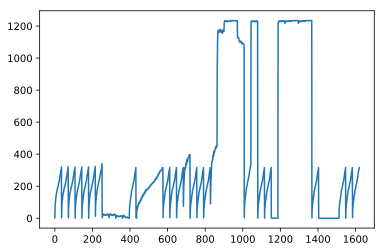

In [85]:
import matplotlib.pyplot as plt
dataX_time_num_nan = np.sum(np.array(dataX_time_with_mask.mask,dtype='float'),axis=0)
plt.plot(dataX_time_num_nan)

In [86]:
nan_1d=np.array(dataX_time_num_nan > 600,dtype='float') # threshold

n=np.sum(nan_1d)
dataX_without_nan_attr=np.zeros((1234,int(len(dataX_time_num_nan)-n)))
dataX_without_nan_attr+=dataX_time[:,list(np.where(nan_1d==0)[0])]#do not reuse it 
h_dataX_without_nan_attr=num_col_36[list(np.where(nan_1d==0)[0])]
print(dataX_without_nan_attr.shape,h_dataX_without_nan_attr)

(1234, 1260) ['M1_Pos' 'M2_Pos' 'M3_Pos' ... 'M34_Meds_r2' 'M35_Meds_r2' 'M36_Meds_r2']


In [87]:
print(num_col_36[list(np.where(nan_1d==1)[0])])

tmp=[]
for s in num_col_36[list(np.where(nan_1d==1)[0])]:
    l=s.split('_')
    tmp.append(l[-1])

tmp,c=np.unique(tmp,return_counts=True)
print(tmp,c)

['M1_AP2se' 'M2_AP2se' 'M3_AP2se' 'M4_AP2se' 'M5_AP2se' 'M6_AP2se'
 'M7_AP2se' 'M8_AP2se' 'M9_AP2se' 'M10_AP2se' 'M11_AP2se' 'M12_AP2se'
 'M13_AP2se' 'M14_AP2se' 'M15_AP2se' 'M16_AP2se' 'M17_AP2se' 'M18_AP2se'
 'M19_AP2se' 'M20_AP2se' 'M21_AP2se' 'M22_AP2se' 'M23_AP2se' 'M24_AP2se'
 'M25_AP2se' 'M26_AP2se' 'M27_AP2se' 'M28_AP2se' 'M29_AP2se' 'M30_AP2se'
 'M31_AP2se' 'M32_AP2se' 'M33_AP2se' 'M34_AP2se' 'M35_AP2se' 'M36_AP2se'
 'M1_AP3se' 'M2_AP3se' 'M3_AP3se' 'M4_AP3se' 'M5_AP3se' 'M6_AP3se'
 'M7_AP3se' 'M8_AP3se' 'M9_AP3se' 'M10_AP3se' 'M11_AP3se' 'M12_AP3se'
 'M13_AP3se' 'M14_AP3se' 'M15_AP3se' 'M16_AP3se' 'M17_AP3se' 'M18_AP3se'
 'M19_AP3se' 'M20_AP3se' 'M21_AP3se' 'M22_AP3se' 'M23_AP3se' 'M24_AP3se'
 'M25_AP3se' 'M26_AP3se' 'M27_AP3se' 'M28_AP3se' 'M29_AP3se' 'M30_AP3se'
 'M31_AP3se' 'M32_AP3se' 'M33_AP3se' 'M34_AP3se' 'M35_AP3se' 'M36_AP3se'
 'M1_AP4se' 'M2_AP4se' 'M3_AP4se' 'M4_AP4se' 'M5_AP4se' 'M6_AP4se'
 'M7_AP4se' 'M8_AP4se' 'M9_AP4se' 'M10_AP4se' 'M11_AP4se' 'M12_AP4se'
 'M13

In [88]:
h_dataX_without_nan_attr_d2=h_dataX_without_nan_attr.reshape(int(dataX_without_nan_attr.shape[1]/36),36)
h_dataX_without_nan_attr_d2
dataX_without_nan_attr_3d=[]

for H in h_dataX_without_nan_attr_d2:
    print(H)

for i in range(int(dataX_without_nan_attr.shape[1]/36)):
    idx=i*int(dataX_without_nan_attr.shape[1]/36)
    dataX_without_nan_attr_3d.append(dataX_without_nan_attr[:,idx:idx+36])
dataX_without_nan_attr_3d=np.array(dataX_without_nan_attr_3d)
print(h_dataX_without_nan_attr_d2,dataX_without_nan_attr_3d[:,0,:])


['M1_Pos' 'M2_Pos' 'M3_Pos' 'M4_Pos' 'M5_Pos' 'M6_Pos' 'M7_Pos' 'M8_Pos'
 'M9_Pos' 'M10_Pos' 'M11_Pos' 'M12_Pos' 'M13_Pos' 'M14_Pos' 'M15_Pos'
 'M16_Pos' 'M17_Pos' 'M18_Pos' 'M19_Pos' 'M20_Pos' 'M21_Pos' 'M22_Pos'
 'M23_Pos' 'M24_Pos' 'M25_Pos' 'M26_Pos' 'M27_Pos' 'M28_Pos' 'M29_Pos'
 'M30_Pos' 'M31_Pos' 'M32_Pos' 'M33_Pos' 'M34_Pos' 'M35_Pos' 'M36_Pos']
['M1_Neg' 'M2_Neg' 'M3_Neg' 'M4_Neg' 'M5_Neg' 'M6_Neg' 'M7_Neg' 'M8_Neg'
 'M9_Neg' 'M10_Neg' 'M11_Neg' 'M12_Neg' 'M13_Neg' 'M14_Neg' 'M15_Neg'
 'M16_Neg' 'M17_Neg' 'M18_Neg' 'M19_Neg' 'M20_Neg' 'M21_Neg' 'M22_Neg'
 'M23_Neg' 'M24_Neg' 'M25_Neg' 'M26_Neg' 'M27_Neg' 'M28_Neg' 'M29_Neg'
 'M30_Neg' 'M31_Neg' 'M32_Neg' 'M33_Neg' 'M34_Neg' 'M35_Neg' 'M36_Neg']
['M1_Aff' 'M2_Aff' 'M3_Aff' 'M4_Aff' 'M5_Aff' 'M6_Aff' 'M7_Aff' 'M8_Aff'
 'M9_Aff' 'M10_Aff' 'M11_Aff' 'M12_Aff' 'M13_Aff' 'M14_Aff' 'M15_Aff'
 'M16_Aff' 'M17_Aff' 'M18_Aff' 'M19_Aff' 'M20_Aff' 'M21_Aff' 'M22_Aff'
 'M23_Aff' 'M24_Aff' 'M25_Aff' 'M26_Aff' 'M27_Aff' 'M28_Aff' 'M29_Aff'
 

In [89]:
for i in range(len(h_dataX_without_nan_attr)):
    if "_p1_" in h_dataX_without_nan_attr[i]:
        print("1",i)
    if "_p2_" in h_dataX_without_nan_attr[i]:
        print("2",i)
    if "_p3_" in h_dataX_without_nan_attr[i]:
        print("3",i)
    if "_p4_" in h_dataX_without_nan_attr[i]:
        print("4",i)

1 432
2 433
3 434
4 435
1 436
2 437
3 438
4 439
1 440
2 441
3 442
4 443
1 444
2 445
3 446
4 447
1 448
2 449
3 450
4 451
1 452
2 453
3 454
4 455
1 456
2 457
3 458
4 459
1 460
2 461
3 462
4 463
1 464
2 465
3 466
4 467
1 468
2 469
3 470
4 471
1 472
2 473
3 474
4 475
1 476
2 477
3 478
4 479
1 480
2 481
3 482
4 483
1 484
2 485
3 486
4 487
1 488
2 489
3 490
4 491
1 492
2 493
3 494
4 495
1 496
2 497
3 498
4 499
1 500
2 501
3 502
4 503
1 504
2 505
3 506
4 507
1 508
2 509
3 510
4 511
1 512
2 513
3 514
4 515
1 516
2 517
3 518
4 519
1 520
2 521
3 522
4 523
1 524
2 525
3 526
4 527
1 528
2 529
3 530
4 531
1 532
2 533
3 534
4 535
1 536
2 537
3 538
4 539
1 540
2 541
3 542
4 543
1 544
2 545
3 546
4 547
1 548
2 549
3 550
4 551
1 552
2 553
3 554
4 555
1 556
2 557
3 558
4 559
1 560
2 561
3 562
4 563
1 564
2 565
3 566
4 567
1 568
2 569
3 570
4 571
1 572
2 573
3 574
4 575


In [90]:
p14_data = dataX_without_nan_attr[:,432:576]
print(p14_data.shape)
p14_name = h_dataX_without_nan_attr[432:576]
print(p14_name)

(1234, 144)
['M1_p1_ddd' 'M1_p2_ddd' 'M1_p3_ddd' 'M1_p4_ddd' 'M2_p1_ddd' 'M2_p2_ddd'
 'M2_p3_ddd' 'M2_p4_ddd' 'M3_p1_ddd' 'M3_p2_ddd' 'M3_p3_ddd' 'M3_p4_ddd'
 'M4_p1_ddd' 'M4_p2_ddd' 'M4_p3_ddd' 'M4_p4_ddd' 'M5_p1_ddd' 'M5_p2_ddd'
 'M5_p3_ddd' 'M5_p4_ddd' 'M6_p1_ddd' 'M6_p2_ddd' 'M6_p3_ddd' 'M6_p4_ddd'
 'M7_p1_ddd' 'M7_p2_ddd' 'M7_p3_ddd' 'M7_p4_ddd' 'M8_p1_ddd' 'M8_p2_ddd'
 'M8_p3_ddd' 'M8_p4_ddd' 'M9_p1_ddd' 'M9_p2_ddd' 'M9_p3_ddd' 'M9_p4_ddd'
 'M10_p1_ddd' 'M10_p2_ddd' 'M10_p3_ddd' 'M10_p4_ddd' 'M11_p1_ddd'
 'M11_p2_ddd' 'M11_p3_ddd' 'M11_p4_ddd' 'M12_p1_ddd' 'M12_p2_ddd'
 'M12_p3_ddd' 'M12_p4_ddd' 'M13_p1_ddd' 'M13_p2_ddd' 'M13_p3_ddd'
 'M13_p4_ddd' 'M14_p1_ddd' 'M14_p2_ddd' 'M14_p3_ddd' 'M14_p4_ddd'
 'M15_p1_ddd' 'M15_p2_ddd' 'M15_p3_ddd' 'M15_p4_ddd' 'M16_p1_ddd'
 'M16_p2_ddd' 'M16_p3_ddd' 'M16_p4_ddd' 'M17_p1_ddd' 'M17_p2_ddd'
 'M17_p3_ddd' 'M17_p4_ddd' 'M18_p1_ddd' 'M18_p2_ddd' 'M18_p3_ddd'
 'M18_p4_ddd' 'M19_p1_ddd' 'M19_p2_ddd' 'M19_p3_ddd' 'M19_p4_ddd'
 'M20_p1_ddd' 'M20_p2_

In [91]:
p14_data = dataX_without_nan_attr[:,432:576]
print(p14_data.shape)
p14_name = h_dataX_without_nan_attr[432:576]
print(p14_name.shape)
p1 = np.zeros((1234,36))
p2 = np.zeros((1234,36))
p3 = np.zeros((1234,36))
p4 = np.zeros((1234,36))

h1 = []#np.zeros((1234,36),dtype='str')
h2 = []#np.zeros((1234,36),dtype='str')
h3 = []#np.zeros((1234,36),dtype='str')
h4 = []#np.zeros((1234,36),dtype='str')
#================
for i in range(1234):
    for j in range(144):
        if j%4 == 0:
            p1[i][int(j/4)] = p14_data[i][j]
        if j%4 == 1:
            p2[i][int(j/4)] = p14_data[i][j]
        if j%4 == 2:
            p3[i][int(j/4)] = p14_data[i][j]
        if j%4 == 3:
            p4[i][int(j/4)] = p14_data[i][j]


for j in range(144):
    if j%4 == 0:
          h1.append(p14_name[j])
    if j%4 == 1:
        h2.append(p14_name[j])
    if j%4 == 2:
         h3.append(p14_name[j])
    if j%4 == 3:
        h4.append(p14_name[j])

print(h1+h2+h3+h4)

(1234, 144)
(144,)
['M1_p1_ddd', 'M2_p1_ddd', 'M3_p1_ddd', 'M4_p1_ddd', 'M5_p1_ddd', 'M6_p1_ddd', 'M7_p1_ddd', 'M8_p1_ddd', 'M9_p1_ddd', 'M10_p1_ddd', 'M11_p1_ddd', 'M12_p1_ddd', 'M13_p1_ddd', 'M14_p1_ddd', 'M15_p1_ddd', 'M16_p1_ddd', 'M17_p1_ddd', 'M18_p1_ddd', 'M19_p1_ddd', 'M20_p1_ddd', 'M21_p1_ddd', 'M22_p1_ddd', 'M23_p1_ddd', 'M24_p1_ddd', 'M25_p1_ddd', 'M26_p1_ddd', 'M27_p1_ddd', 'M28_p1_ddd', 'M29_p1_ddd', 'M30_p1_ddd', 'M31_p1_ddd', 'M32_p1_ddd', 'M33_p1_ddd', 'M34_p1_ddd', 'M35_p1_ddd', 'M36_p1_ddd', 'M1_p2_ddd', 'M2_p2_ddd', 'M3_p2_ddd', 'M4_p2_ddd', 'M5_p2_ddd', 'M6_p2_ddd', 'M7_p2_ddd', 'M8_p2_ddd', 'M9_p2_ddd', 'M10_p2_ddd', 'M11_p2_ddd', 'M12_p2_ddd', 'M13_p2_ddd', 'M14_p2_ddd', 'M15_p2_ddd', 'M16_p2_ddd', 'M17_p2_ddd', 'M18_p2_ddd', 'M19_p2_ddd', 'M20_p2_ddd', 'M21_p2_ddd', 'M22_p2_ddd', 'M23_p2_ddd', 'M24_p2_ddd', 'M25_p2_ddd', 'M26_p2_ddd', 'M27_p2_ddd', 'M28_p2_ddd', 'M29_p2_ddd', 'M30_p2_ddd', 'M31_p2_ddd', 'M32_p2_ddd', 'M33_p2_ddd', 'M34_p2_ddd', 'M35_p2_ddd', 'M36

In [92]:
p14_merge = np.concatenate((p1,p2),axis=1)
p14_merge = np.concatenate((p14_merge,p3),axis=1)
p14_merge = np.concatenate((p14_merge,p4),axis=1)
print(p14_merge.shape)


h14_merge = np.array(h1+h2+h3+h4)
print(h14_merge.shape)

(1234, 144)
(144,)


In [93]:
trainX_time_sorted = np.concatenate((dataX_without_nan_attr[:,:432],dataX_without_nan_attr[:,576:]),axis=1)
#trainX_time_sorted = np.concatenate((trainX_time_sorted,dataX_without_nan_attr[:,576:]),axis=1)
print(trainX_time_sorted.shape)

name_time_sorted = np.concatenate((h_dataX_without_nan_attr[:432],h14_merge),axis=0)
name_time_sorted = np.concatenate((name_time_sorted,h_dataX_without_nan_attr[576:]),axis=0)
print(name_time_sorted.shape)
#trainX_time_sorted= np.array(preprocessing.normalize(trainX_time_sorted, norm='l2', axis=0, copy=True, return_norm=True)[0])


(1234, 1116)
(1260,)


In [94]:
dataX_without_nan_attr_3d=[]
for i in range(int(trainX_time_sorted.shape[1]/36)):
    idx=i*36
    dataX_without_nan_attr_3d.append(trainX_time_sorted[:,idx:idx+36])
dataX_without_nan_attr_3d=np.array(dataX_without_nan_attr_3d)
print(dataX_without_nan_attr_3d.shape)

(31, 1234, 36)


In [95]:
dataX_without_nan_attr_3d.transpose(1,0,2)
tmp=[]
for i in range(1234):
    tmp.append(dataX_without_nan_attr_3d[:,i,:])

np.sum(np.ma.masked_invalid(np.array(tmp)-dataX_without_nan_attr_3d.transpose(1,0,2)))

0.0

In [96]:
dataX_without_nan_attr_3d=dataX_without_nan_attr_3d.transpose(1,0,2)
print(dataX_without_nan_attr_3d.shape)

(1234, 31, 36)


In [97]:
dataX_no_nan=np.zeros((1234,36,int(trainX_time_sorted.shape[1]/36)))
for i in range(1234):
    temp=pd.DataFrame(dataX_without_nan_attr_3d[i,:,:].T)
    #print(df)
    temp=temp.interpolate(method='linear',limit_direction='both')
    #print(np.array(df))
    #print(temp)
    dataX_no_nan[i,:,:]+=np.array(temp)
    #print(np.max(tmp),tmp[np.argmax(tmp)]) 
print(dataX_no_nan.shape)

(1234, 36, 31)


In [98]:
sample_mean=np.mean(np.ma.masked_invalid(dataX_no_nan),axis=0)
print(sample_mean.shape)
for k in range(1234):
    for i in range(31):
        for j in range(36):
            if np.isnan(dataX_no_nan[k,j,i]):
                dataX_no_nan[k,j,i]=sample_mean[j,i]
                print(k,j,i,dataX_no_nan[k,j,i])

(36, 31)
42 0 20 0.5790754257907542
42 1 20 0.5815085158150851
42 2 20 0.5812767929556252
42 3 20 0.5860464218128452
42 4 20 0.5871699418509956
42 5 20 0.5868741593749528
42 6 20 0.5852266602187264
42 7 20 0.5852012210787202
42 8 20 0.6622236327091928
42 9 20 0.49456022191661675
42 10 20 0.44729421582801454
42 11 20 0.4515286152544166
42 12 20 0.5717403058405915
42 13 20 0.5574641380230643
42 14 20 0.5964050559043745
42 15 20 0.5946322673785477
42 16 20 0.5525783217832427
42 17 20 0.6179858522625525
42 18 20 0.6087245533285073
42 19 20 0.6321747980549108
42 20 20 0.5506777597318415
42 21 20 0.5631354285021655
42 22 20 0.6257417861073096
42 23 20 0.5968639587976119
42 24 20 0.6006436064811557
42 25 20 0.6228741868492088
42 26 20 0.6013091467793057
42 27 20 0.6457313888185506
42 28 20 0.668390992306836
42 29 20 0.6719238047705202
42 30 20 0.6706095202445567
42 31 20 0.6717283257429243
42 32 20 0.6523010377024976
42 33 20 0.6100567721005677
42 34 20 0.6666666666666666
42 35 20 0.629359286

565 33 15 0.1859804798463752
565 34 15 0.17059829888107822
565 35 15 0.1630971993410214
594 0 15 0.6540362438220758
594 1 15 0.5098245102121446
594 2 15 0.3913208568322921
594 3 15 0.33946528857251806
594 4 15 0.2888790029246953
594 5 15 0.29153486300362774
594 6 15 0.2745883183483598
594 7 15 0.25459955460886297
594 8 15 0.2478792723421308
594 9 15 0.24872678380464214
594 10 15 0.2532516608267268
594 11 15 0.2293643267759742
594 12 15 0.2339872131155008
594 13 15 0.21941734821944242
594 14 15 0.21566843063527041
594 15 15 0.22727080782990566
594 16 15 0.2070218494664508
594 17 15 0.21329844316396804
594 18 15 0.21043686209679635
594 19 15 0.21255951060199263
594 20 15 0.20842415068690698
594 21 15 0.20825211190977178
594 22 15 0.18957928506842187
594 23 15 0.1899135357184987
594 24 15 0.2010913078576359
594 25 15 0.2153273159215659
594 26 15 0.20919447902851251
594 27 15 0.21230205164357865
594 28 15 0.19944116109084065
594 29 15 0.19302971833845653
594 30 15 0.19179596445404135
594 3

935 24 15 0.2010913078576359
935 25 15 0.2153273159215659
935 26 15 0.20919447902851251
935 27 15 0.21230205164357865
935 28 15 0.19944116109084065
935 29 15 0.19302971833845653
935 30 15 0.19179596445404135
935 31 15 0.18809104088264103
935 32 15 0.2004212628356778
935 33 15 0.1859804798463752
935 34 15 0.17059829888107822
935 35 15 0.1630971993410214
939 0 15 0.6540362438220758
939 1 15 0.5098245102121446
939 2 15 0.3913208568322921
939 3 15 0.33946528857251806
939 4 15 0.2888790029246953
939 5 15 0.29153486300362774
939 6 15 0.2745883183483598
939 7 15 0.25459955460886297
939 8 15 0.2478792723421308
939 9 15 0.24872678380464214
939 10 15 0.2532516608267268
939 11 15 0.2293643267759742
939 12 15 0.2339872131155008
939 13 15 0.21941734821944242
939 14 15 0.21566843063527041
939 15 15 0.22727080782990566
939 16 15 0.2070218494664508
939 17 15 0.21329844316396804
939 18 15 0.21043686209679635
939 19 15 0.21255951060199263
939 20 15 0.20842415068690698
939 21 15 0.20825211190977178
939 2

In [99]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

class RocAucMetricCallback(keras.callbacks.Callback):  
    def __init__(self, predict_batch_size=1024, include_on_batch=False):  
        super(RocAucMetricCallback, self).__init__()  
        self.predict_batch_size=predict_batch_size  
        self.include_on_batch=include_on_batch  
  
    def on_batch_begin(self, batch, logs={}):  
        pass  
  
    def on_batch_end(self, batch, logs={}):  
        if(self.include_on_batch):  
            logs['roc_auc_val']=float('-inf')  
            if(self.validation_data):  
                logs['roc_auc_val']=roc_auc_score(self.validation_data[1],   
                                                  self.model.predict(self.validation_data[0],  
                                                                     batch_size=self.predict_batch_size))  
  
    def on_train_begin(self, logs={}):  
        if not ('roc_auc_val' in self.params['metrics']):  
            self.params['metrics'].append('roc_auc_val')  
  
    def on_train_end(self, logs={}):  
        pass  
  
    def on_epoch_begin(self, epoch, logs={}):  
        pass  
  
    def on_epoch_end(self, epoch, logs={}):  
        logs['roc_auc_val']=float('-inf')  
        if(self.validation_data):  
            logs['roc_auc_val']=roc_auc_score(self.validation_data[1],   
                                              self.model.predict(self.validation_data[0],  
                                                                 batch_size=self.predict_batch_size))  
            
cb = [  
    #my_callbacks.
    RocAucMetricCallback(), # include it before EarlyStopping!  
    EarlyStopping(monitor='roc_auc_val',patience=5, verbose=2,mode='max')  
]  

In [100]:
def run_cv_cnn_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        
        
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
        testY=testY.reshape(testY.shape[0],1)
        #print(trainX.shape, trainY.shape)
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
        #print(testYscores.shape)
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

#### 5.2.1. 1D convolutional 
- 2D concolutional network helps in images classification since it extracts different features from 2D series. Therefore, time series a 1D series, could be performed 1D convolution

In [102]:
def cnn(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    N=int(len(trainX))
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    '''
    earlystop = keras.callbacks.EarlyStopping(
               monitor='roc_auc_val',             # use validation accuracy for stopping
               min_delta=0.0001, patience=5, 
               verbose=1, mode='auto')
    callbacks_list = [earlystop]
    '''
    trainY=trainY.reshape(trainY.shape[0],1)
    #validI=trainX[N:,:,:,:]
    #validYb=np.array(trainY[N:,:],dtype='int')
    #print(validYb.shape)
    #print(trainX[:N,:,:,:].shape)
    #validsetI = (validI, validYb)

    rnn=Sequential()
    #rnn.add((36,activation='relu',input_shape=(36,35)))
    rnn.add(Conv2D(16, (36,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              input_shape=(1,36,int(trainX_time_sorted.shape[1]/36))))
    rnn.add(Conv2D(32, (18,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    rnn.add(Conv2D(64, (9,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    rnn.add(Conv2D(128, (5,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    rnn.add(Dropout(0.5,seed=44))
    rnn.add(Flatten())
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=45))
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=46))
    rnn.add(Dense(units=128, activation='relu'))
    rnn.add(Dropout(0.5,seed=47))
    rnn.add(Dense(units=1, activation='sigmoid'))
    rnn.compile(loss='binary_crossentropy',#keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
            metrics=[auc])

    history = rnn.fit(trainX[:N,:,:,:], np.array(trainY[:N],dtype='int'), epochs=20, batch_size=50, 
                 #callbacks=cb,#callbacks_list, 
                 #validation_data=validsetI, 
                verbose=False)
    # fit the classifier
    
    # predict the scores, and return them
    testYscores = rnn.predict_proba(testX)#[:,1]#np.array(rnn.predict(testX)[:,1]>rnn.predict(testX)[:,0],dtype='int')#[:,1]
    #print(rnn.predict(testX))#[:,1])
    #print(testYscores)
    return(testYscores)

In [103]:
print(dataX_no_nan.reshape(1234,1,36,int(trainX_time_sorted.shape[1]/36)).shape)
allout = run_cv_cnn_experiment(cnn, dataX_no_nan.reshape(1234,1,36,int(trainX_time_sorted.shape[1]/36)))

(1234, 1, 36, 31)
*** CV 0: test auc = 0.6824712643678161
*** CV 1: test auc = 0.6948275862068966
*** CV 2: test auc = 0.7919540229885058
*** CV 3: test auc = 0.7227011494252873
*** CV 4: test auc = 0.6373563218390804
*** CV 5: test auc = 0.6830459770114943
*** CV 6: test auc = 0.6727011494252874
*** CV 7: test auc = 0.6077586206896551
*** CV 8: test auc = 0.5422413793103448
*** CV 9: test auc = 0.6413793103448275


#### 5.2.2. rnn
- it is typical to use rnn for time series.

In [105]:
def run_cv_cnn_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        
        
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
        testY=testY.reshape(testY.shape[0],1)
        #print(trainX.shape, trainY.shape)
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
        #print(testYscores.shape)
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores
            })
        
    # return all the information
    return(allout)

        

In [104]:
from keras.layers.recurrent import SimpleRNN
def rnn_many2one_classifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    #N=int(len(trainX))
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    '''
    earlystop = keras.callbacks.EarlyStopping(
               monitor='roc_auc_val',             # use validation accuracy for stopping
               min_delta=0.0001, patience=5, 
               verbose=1, mode='auto')
    callbacks_list = [earlystop]
    '''
    trainY3d=np.zeros((trainY.shape[0],36,1))
    for i in range(trainY.shape[0]):
        tmp=trainY[i]
        #print(stats.mode(trainX[i,1:,:],axis=1)[0].shape)
        #return
        #trainY3d[i,:35,:]+=stats.mode(trainX[i,1:,:],axis=1)[0]
        trainY3d[i,:,:]+=tmp
    #validI=trainX[N:,:,:]
    #validYb=np.array(trainY[N:],dtype='int')

    #validsetI = (validI, validYb)
    #print(validI.shape,validYb.shape)
    rnn=Sequential()
    rnn.add(SimpleRNN(36, return_sequences=False,
                    input_shape=(36, 31),unroll=True))
    rnn.add(Dropout(0.5,seed=44))
    rnn.add(Dense(units=512, activation='relu'))
    rnn.add(Dropout(0.5,seed=45))
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=46))
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=47))
    rnn.add(Dense(units=64, activation='relu'))
    rnn.add(Dropout(0.5,seed=48))
    #rnn.add(Dense(units=2, activation='softmax'))
    #rnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
    #       optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
    #      metrics=['accuracy'])
    rnn.add(Dense(units=1, activation='sigmoid'))
    rnn.compile(loss='binary_crossentropy',#keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
            metrics=[auc])
    history = rnn.fit(trainX, np.array(trainY,dtype='int'), epochs=10, batch_size=50, 
                 #callbacks=cb,#callbacks_list, 
                 #validation_data=validsetI, 
                verbose=False)
    # fit the classifier
    
    # predict the scores, and return them
    testYscores = rnn.predict_proba(testX)#[:,1]#np.array(rnn.predict(testX)[:,1]>rnn.predict(testX)[:,0],dtype='int')#[:,1]
    #print(rnn.predict(testX))#[:,1])
    print(testYscores.shape)
    return(testYscores)


In [ ]:
allout = run_cv_experiment(rnn_many2one_classifier, dataX_no_nan)

#### 5.2.3. LSTM
- LSTM an enhanced form of RNN is tried

In [ ]:
# Build Model...

#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', auroc])
from keras.layers import LSTM 
from scipy import stats
def lstm_many2many_classifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    #N=int(len(trainX))
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    '''
    earlystop = keras.callbacks.EarlyStopping(
               monitor='roc_auc_val',             # use validation accuracy for stopping
               min_delta=0.0001, patience=5, 
               verbose=1, mode='auto')
    callbacks_list = [earlystop]
    '''
    trainY3d=np.zeros((trainY.shape[0],36,1))
    for i in range(trainY.shape[0]):
        tmp=trainY[i]
        #print(stats.mode(trainX[i,1:,:],axis=1)[0].shape)
        #return
        #trainY3d[i,:35,:]+=stats.mode(trainX[i,1:,:],axis=1)[0]
        trainY3d[i,:,:]+=tmp
    #validI=trainX[N:,:,:]
    #validYb=np.array(trainY[N:],dtype='int')

    #validsetI = (validI, validYb)
    #print(validI.shape,validYb.shape)
    rnn=Sequential()
    rnn.add(LSTM(36,activation='relu',input_shape=(36,31),return_sequences=True))
    rnn.add(Dropout(0.5,seed=44))
    rnn.add(Dense(units=512, activation='relu'))
    rnn.add(Dropout(0.5,seed=45))
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=46))
    rnn.add(Dense(units=128, activation='relu'))
    rnn.add(Dropout(0.5,seed=47))
    rnn.add(Dense(units=64, activation='relu'))
    rnn.add(Dropout(0.5,seed=48))
    #rnn.add(Dense(units=2, activation='softmax'))
    #rnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
    #       optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
    #      metrics=['accuracy'])
    rnn.add(Dense(units=1, activation='sigmoid'))
    rnn.compile(loss='binary_crossentropy',#keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
            metrics=[auc])
    history = rnn.fit(trainX, np.array(trainY3d,dtype='int'), epochs=20, batch_size=50, 
                 #callbacks=cb,#callbacks_list, 
                 #validation_data=validsetI, 
                verbose=False)
    # fit the classifier
    
    # predict the scores, and return them
    testYscores = rnn.predict_proba(testX)#[:,1]#np.array(rnn.predict(testX)[:,1]>rnn.predict(testX)[:,0],dtype='int')#[:,1]
    #print(rnn.predict(testX))#[:,1])
    print(testYscores.shape)
    return(list(np.mean(testYscores[:,:,:],axis=1)))

#### 5.2.4. CNN+LSTM
- use CNN to extract features, use lstm model for training is popular currently. Therefore, we have a try

In [106]:
# Build Model...

#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', auroc])
from keras.layers import LSTM 
from keras.layers import TimeDistributed
def lstm_many2one_classifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    #N=int(len(trainX))
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    '''
    earlystop = keras.callbacks.EarlyStopping(
               monitor='roc_auc_val',             # use validation accuracy for stopping
               min_delta=0.0001, patience=5, 
               verbose=1, mode='auto')
    callbacks_list = [earlystop]
    '''
    trainY=trainY.reshape(trainY.shape[0],1)
    #validI=trainX[N:,:,:]
    #validYb=np.array(trainY[N:],dtype='int')

    #validsetI = (validI, validYb)
    #print(validI.shape,validYb.shape)
    rnn=Sequential()
    
    rnn.add(Conv2D(16, (36,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              input_shape=(1,36,int(trainX_time_sorted.shape[1]/36))))
    rnn.add(Conv2D(32, (18,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    rnn.add(Conv2D(64, (9,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    rnn.add(Conv2D(128, (5,1),        # channel, kerne size
              strides=(1,1),    # stride
              activation='relu',
              padding='same',   # convolution padding
              data_format='channels_first', # using channel-first format              
              ))
    #rnn.add(Dropout(0.5,seed=43))
    rnn.add(TimeDistributed(Flatten()))
    rnn.add(LSTM(36,activation='relu',input_shape=(36,31)))
    rnn.add(Dropout(0.5,seed=44))
    rnn.add(Dense(units=512, activation='relu'))
    rnn.add(Dropout(0.5,seed=45))
    rnn.add(Dense(units=256, activation='relu'))
    rnn.add(Dropout(0.5,seed=46))
    rnn.add(Dense(units=128, activation='relu'))
    rnn.add(Dropout(0.5,seed=47))
    rnn.add(Dense(units=64, activation='relu'))
    rnn.add(Dropout(0.5,seed=48))
    #rnn.add(Dense(units=2, activation='softmax'))
    #rnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
    #       optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
    #      metrics=['accuracy'])
    rnn.add(Dense(units=1, activation='sigmoid'))
    rnn.compile(loss='binary_crossentropy',#keras.losses.sparse_categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True), 
            metrics=[auc])
    history = rnn.fit(trainX, np.array(trainY,dtype='int'), epochs=10, batch_size=50, 
                 #callbacks=cb,#callbacks_list, 
                 #validation_data=validsetI, 
                verbose=False)
    # fit the classifier
    
    # predict the scores, and return them
    testYscores = rnn.predict_proba(testX)#[:,1]#np.array(rnn.predict(testX)[:,1]>rnn.predict(testX)[:,0],dtype='int')#[:,1]
    #print(rnn.predict(testX))#[:,1])
    #print(testYscores)
    return(testYscores)

In [ ]:
allout = run_cv_experiment(lstm_many2one_classifier, dataX_no_nan.reshape(1234,1,36,int(trainX_time_sorted.shape[1]/36)))

#### 5.2.5. DTW 
- For time series DTW is another conventional. On the obtained distance matrix KNN is performed

In [ ]:
DD=np.zeros((1234,1234))
X=dataX_no_nan


for i in range(1234):
    for j in range(i,1234):
        print(i,j)
        DD[i,j],_=fastdtw(X[i,:,:],X[j,:,:],dist=euclidean)
        DD[j,i]=DD[i,j]

In [107]:
DD=np.genfromtxt('dtw.csv',delimiter=',')
print(DD.shape)
print(DD)

(1234, 1234)
[[   0.         1013.81485352  940.72010354 ...  879.51159083
   990.97312966  757.17540442]
 [1013.81485352    0.          603.30361712 ... 1033.10252269
   370.51964468  665.62394021]
 [ 940.72010354  603.30361712    0.         ...  861.60212085
   446.14170179  358.39583687]
 ...
 [ 879.51159083 1033.10252269  861.60212085 ...    0.
  1059.75956607  949.86084197]
 [ 990.97312966  370.51964468  446.14170179 ... 1059.75956607
     0.          507.23840695]
 [ 757.17540442  665.62394021  358.39583687 ...  949.86084197
   507.23840695    0.        ]]


In [108]:
from scipy import stats
def knn_self(trainX, trainY, testX):
    result=[]
    for i in testX[:,0]:
        #print(DD[i,trainX[:,0]].shape
        k_neighbor=np.argsort(DD[i,trainX[:,0]])[:473]
        result.append(np.mean(trainY[k_neighbor]))
        #print(stats.mode(trainY[k_neighbor]))
        #result.append(stats.mode(trainY[k_neighbor])[0])
    return (result)

In [109]:
allout = run_cv_experiment(knn_self,np.array(range(1234),dtype='int').reshape(1234,1))

*** CV 0: test auc = 0.6741379310344827
*** CV 1: test auc = 0.7017241379310345
*** CV 2: test auc = 0.8290229885057472
*** CV 3: test auc = 0.766235632183908
*** CV 4: test auc = 0.6604885057471265
*** CV 5: test auc = 0.6866379310344828
*** CV 6: test auc = 0.6920977011494253
*** CV 7: test auc = 0.6313218390804597
*** CV 8: test auc = 0.5820402298850575
*** CV 9: test auc = 0.6522988505747126


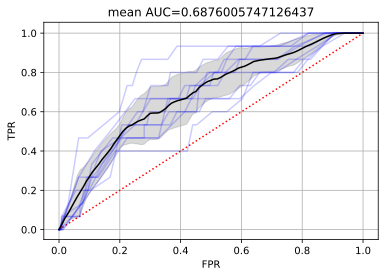

In [110]:
meanauc = plotROCs(allout)

- In conclusion, the time series are not of significance since the overall performance is not very high. In addition, the classic machine learning algorithms is better in this context, this might be accounted for by the limitation of the data and the imbalanced natural of the whole dataset.

## Conclusion

- After all trials above, we combine the best models in each step to generate our final result.
- The settings of our last trial is:
    - Feature selection: remove "ignore variable" and the variables with >400 NaN cells. And use ANOVA F-value between label/feature to select the top-280 features.
    - Data preprocessing: use l2-norm, and LFM-based imputer to fill in the NaN values. Use gaussian noise for oversampling.
    - Model selection: we ensemble two Random Forest models with different tree numbers.
    